# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [6]:
# Run using 'conda activate dev' now. SciPy won't load in PythonData (old)

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [8]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [9]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview


In [10]:
# Need a column to key on (shared column)

mouse_metadata.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15


In [11]:
study_results.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0


In [12]:
# "Mouse ID" is the shared column between files

In [13]:
# Combine the data into a single dataset     Made to match display of starter file
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study_complete.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29


In [14]:
# Checking the number of mice? All     Guess this would be the rows of data
len(mouse_study_complete)

1893

In [15]:
mouse_study_complete_df = pd.DataFrame(mouse_study_complete)     # How many mice
mouse_study_complete_df['Mouse ID'].nunique()

249

In [17]:
mouse_study_complete_df.columns     # Show columns dealing with


Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [18]:
mouse_study_complete_df['Mouse ID'].duplicated().count()

1893

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.   #https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/
duplicates = mouse_study_complete[mouse_study_complete.duplicated()]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [20]:
# Optional: Get all the data for the duplicate mouse ID.   # These rows look OK to me?
list_duplicates = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID', 'Timepoint'])]
list_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_complete_df
mouse_study_clean.drop_duplicates(subset=['Mouse ID'], keep='last', inplace=True)     # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
# mouse_study_complete_df.drop_duplicates(subset=['Mouse ID'], keep='last')
mouse_study_clean.sample(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1818,c302,45,64.575222,4,Zoniferol,Female,10,29
1,f932,0,45.000000,0,Ketapril,Male,15,29


## Summary Statistics (using mouse_study_clean, with duplicates removed)

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       #'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      #dtype='object')

mouse_study_clean.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,32.911647,54.999137,1.682731,12.730924,26.116466
std,15.465109,12.655080,1.325823,7.228687,3.697003
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,20.000000,45.934712,1.000000,6.000000,25.000000
50%,45.000000,55.841410,1.000000,13.000000,27.000000
75%,45.000000,64.957562,3.000000,19.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [26]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# mean_study_drug_regimen

In [27]:
mouse_study_summary = pd.DataFrame({
                                "Mean Tumor Volume" : mean_study_drug_regimen,
                                "Median Tumor Volume" : median_study_drug_regimen,
                                "Tumor Volume Variance" : var_study_drug_regimen,
                                "Tumor Volume Std. Dev." : std_study_drug_regimen,
                                "Tumor Volume Std. Err." : sem_study_drug_regimen
                            })

mouse_study_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Confused on description

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

# stats_list = ['mean', 'median', 'var', 'std', 'sem']     # https://proclusacademy.com/blog/quicktip/summary-stats-pandas/
# summary_stats_test = mouse_study_summary.agg(func=stats_list)
# summary_stats_test

# agg_func_describe = {'Tumor Volume (mm3)': ['describe']}     # https://pbpython.com/groupby-agg.html
# mouse_study_complete.groupby(['Drug Regimen']).agg(agg_func_describe).round(2)

agg_func_describe = {'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}   
mouse_study_complete.groupby(['Drug Regimen']).agg(agg_func_describe).round(2)



Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.85  42.35  6.51  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [30]:
mouse_study_drugs = mouse_study_complete
mouse_study_drugs.tail(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30
1892,b879,45,72.555239,2,Stelasyn,Female,4,26


In [31]:
drug_use = mouse_study_drugs["Drug Regimen"].value_counts()
print(drug_use)

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64


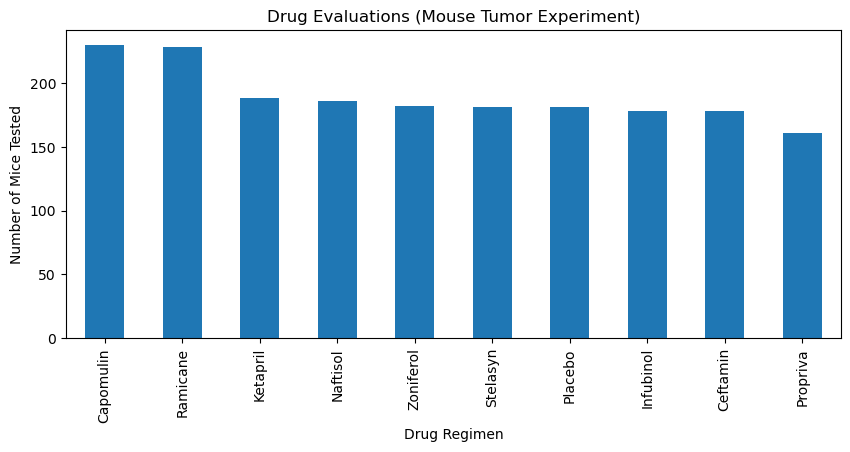

In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Pandas plot
drug_use.plot(kind="bar", figsize=(10,4))

plt.title("Drug Evaluations (Mouse Tumor Experiment)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

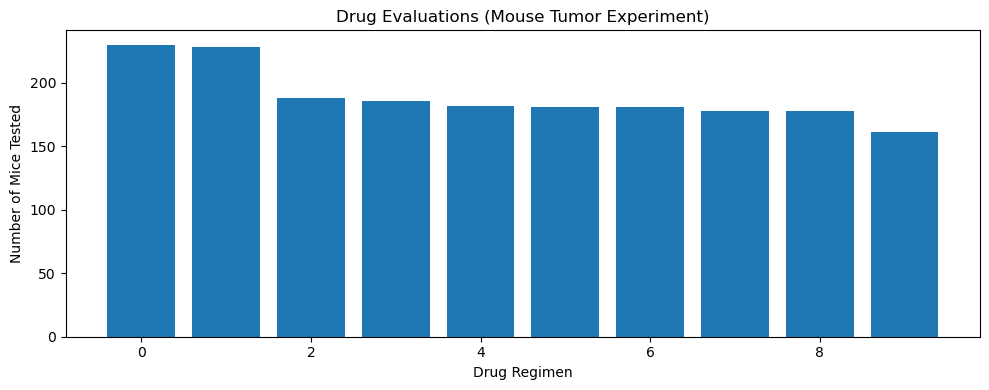

In [45]:
# Pyplot method
x_axis = np.arange(len(drug_use))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(10,4))
plt.bar(x_axis, drug_use)

plt.title("Drug Evaluations (Mouse Tumor Experiment)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()
plt.show()

# plt.xticks(tick_locations,["Drug Regimen"], rotation="vertical")

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mouse_study_graph = mouse_study_complete

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

In [48]:
male_mice = (mouse_study_graph["Sex"]=="Male").sum()
female_mice = (mouse_study_graph["Sex"]=="Female").sum()
total_mice = male_mice ++ female_mice
percent_male_mice = male_mice / total_mice
percent_female_mice = female_mice / total_mice

# print("Male mice ",male_mice,"  ",percent_male_mice,"%")
# print("Female mice ",female_mice,"  ",percent_female_mice,"%")
# print("Total mice ",total_mice," at",percent_male_mice ++ percent_female_mice,"%")

# Pandas Pie Chart

<Axes: ylabel='Sex'>

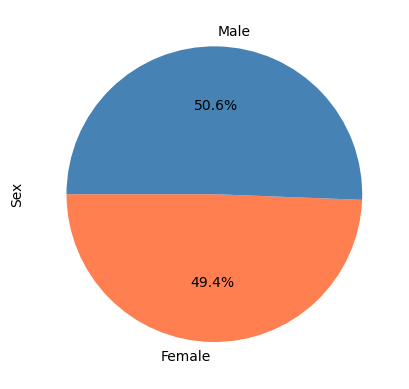

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html

dataframe = pd.DataFrame({'Gender' : ['Male', 'Female'],
                         'Sex' :[percent_male_mice,percent_female_mice]})
colors = ['coral', 'steelblue']
dataframe.groupby(['Gender']).sum().plot(kind='pie', y='Sex', autopct='%1.1f%%', colors=colors, startangle=180, legend=False)

# Pyplot Pie Chart

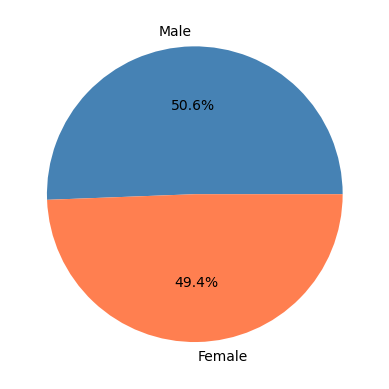

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
Sex = ([percent_male_mice, percent_female_mice])
colors = ['steelblue', 'coral']
plt.pie(Sex, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [52]:
# Get the last (greatest) timepoint for each mouse
mouse_study_graph4 = mouse_study_clean
max_mouse_days = mouse_study_graph4.groupby(["Timepoint"]) == "45"
max_mouse_days

# max_mouse_days
#mouse_study_graph5 = mouse_study_graph4
#mouse_study_graph5 = pd.DataFrame["Max Time"]

# mouse_study_graph4.describe()     # Max Timepoint at 45
# final_drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# final_drugs

False

In [53]:
max_mouse_days.columns

AttributeError: 'bool' object has no attribute 'columns'

In [54]:
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,f932,0,45.000000,0,Ketapril,Male,15,29
20,x336,0,45.000000,0,Naftisol,Female,4,29
53,h428,0,45.000000,0,Ketapril,Female,1,27
55,v199,0,45.000000,0,Naftisol,Female,17,29
109,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [55]:
# mouse_study_comparison = pd.merge(mouse_study_graph4,max_mouse_days, how="left", on=["Mouse ID","Timepoint"])
mouse_study_comparison=pd.merge(mouse_study_graph4,max_mouse_days, on='Mouse ID')
mouse_study_comparison

TypeError: Can only merge Series or DataFrame objects, a <class 'bool'> was passed

In [56]:
mouse_study_comparison2 = mouse_study_comparison
mouse_study_comparison2 = mouse_study_comparison2.drop(columns=['Timepoint_x','Tumor Volume (mm3)_x','Metastatic Sites_x','Drug Regimen_x'])
mouse_study_comparison2 = mouse_study_comparison2.drop(columns=['Sex_x','Age_months_x','Weight (g)_x'])
mouse_study_comparison2

NameError: name 'mouse_study_comparison' is not defined

In [57]:
#final_drugs=pd.DataFrame({})

In [58]:
#final_drugs = (mouse_study_graph4
#final_drugs
#final_drug_result = mouse_study_graph4.groupby(["Drug Regimen"].max()["Timepoint"])


In [59]:
# Create a list of drugs to report:  Capomulin, Ramicane, Infubinol, and Ceftamin

#Capomulinrx = mouse_study_graph4[(mouse_study_graph4["Drug Regimen"] == "Capomulin")]
# print(Capomulinrx)
#Ramicanerx = mouse_study_graph4[(mouse_study_graph4["Drug Regimen"] == "Ramicane")]
# print(Ramicanerx)
#Infubinolrx = mouse_study_graph4[(mouse_study_graph4["Drug Regimen"] == "Infubinol")]
# print(Infubinolrx)
#Ceftaminrx = mouse_study_graph4[(mouse_study_graph4["Drug Regimen"] == "Ceftamin")]
# print(Ceftaminrx)

In [60]:
#last_Capomulinrx = Capomulinrx.groupby(["Drug Regimen"]).max()["Timepoint"]
#last_Ramicanerx = Ramicanerx.groupby(["Drug Regimen"]).max()["Timepoint"]
#last_Infubinolrx = Infubinolrx.groupby(["Drug Regimen"]).max()["Timepoint"]
#last_Ceftaminrx = Ceftaminrx.groupby(["Drug Regimen"]).max()["Timepoint"]

#last_Capomulinrx
#last_Ramicanerx
#last_Infubinolrx
#last_Ceftaminrx

In [61]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#mean_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#median_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#var_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#std_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#sem_study_drug_regimen = mouse_study_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# mean_study_drug_regimen

In [62]:
# I THINK THIS SHOULD BE A FINAL FILTER STEP. NOT A FIRST SETUP STEP -  NOPE!


# mouse_study_graph4 = pd.DataFrame({
                                #"Capomulin" : last_Capomulinrx,
                                #"Ramicane" : last_Ramicanerx,
                                #"Infubinol" : last_Infubinolrx,
                                #"Ceftaminrx" : last_Ceftaminrx
                                #})

# mouse_study_graph4

In [63]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [64]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [65]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Use Mouse ID 'l509' to match starter example
# Filter data for Capomulin Drug Regimen
# Timepoint(days) for the x axis, Tumor Volume (mm3) for the y axis
# Lookup min and max for Timepoint to set x axis range (x_axis = np.arange(min, max, 10)
# Lookup min and max for Tumor Volume (mm3) for y axis? Not necessary, use default autorange?
# Label the chart, "Capomulin treatment of mouse l509"

# Create a new DataFrame for Capomulin

mouse_study_graph.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29


In [67]:
capomulin_study = mouse_study_graph[(mouse_study_graph["Drug Regimen"] == "Capomulin")]
# capomulin_study.head(3)

In [68]:
# Use mouse l509
mouse_to_study = capomulin_study[(capomulin_study["Mouse ID"] == "l509")]
# mouse_to_study.head(3)

In [69]:
mouse_to_study.describe()     # Use descriptive statistics to show min and max for chart axes

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,10.000000,10.000000,10.000000,10.0,10.0
mean,22.500000,44.434474,1.400000,17.0,21.0
std,15.138252,2.799595,1.074968,0.0,0.0
min,0.000000,40.207288,0.000000,17.0,21.0
25%,11.250000,42.113820,0.250000,17.0,21.0
50%,22.500000,44.854027,2.000000,17.0,21.0
75%,33.750000,46.532103,2.000000,17.0,21.0
max,45.000000,48.070452,3.000000,17.0,21.0


In [70]:
Timepoints = mouse_to_study["Timepoint"]
# Timepoints.head(20)

In [71]:
tumor_vol = mouse_to_study["Tumor Volume (mm3)"]
# tumor_vol.head(3)

In [72]:
# print("Timepoint starts at (units): ",min(mouse_to_study["Timepoint"]))
# print("Timepoint ends at (units): ",max(mouse_to_study["Timepoint"]))

In [73]:
# Determine the x axis range from the min/max Timepoint column
# x_axis_min = min(mouse_to_study["Timepoint"])
# x_axis_max = max(mouse_to_study["Timepoint"])
# print("X range sets from : ", x_axis_min, " to ", x_axis_max, " for Timepoint (units)")

In [74]:
# Set the x axis range for the chart
# x_axis = np.arange(x_axis_min, x_axis_max + 10, 10)
x_axis = np.arange(0, 50, 10)

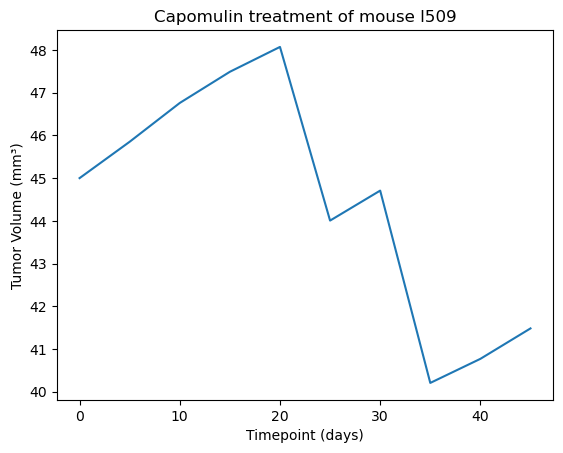

In [75]:
# Plot the line
#plt.plot(x_axis, tumor_vol)

plt.plot(Timepoints, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm³)")
plt.show()

In [76]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# x axis will be Weight (g) - need the weights from the graph dataframe
# y axis will be Average Tumor Volume (mm³) - will be created for the average value
# plot will be used for the Correlation and Regression homework below
# need to pass list of tumor volumes to weight values (weigth : 15, 19, 25...)
# weight is index and x range


In [77]:
capomulin_study2 = mouse_study_graph[(mouse_study_graph["Drug Regimen"] == "Capomulin")]

In [78]:
capomulin_study2.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17


In [79]:
# ave_tumor_list = mouse_study_graph([mouse_study_graph["Tumor Volume (mm3)"].count()])
# ave_tumor = mouse_study_graph[(mouse_study_graph["Tumor Volume (mm3)"]).mean()["Tumor Volume (mm3)"]
# ave_tumor
# ave_tumor_volume = df.DataFrame.groupby('Tumor Volume (mm3)')

In [80]:
# capomulin_study2.describe()

In [81]:
# Try weight vs tumor volume (NOT AVERAGE)
#weight = (capomulin_study2["Weight (g)"])
# tumor_volume = (capomulin_study2["Tumor Volume (mm3)"])
#df.groupby(capomulin_study2["Tumor Volume (mm3"])

In [82]:
#plt.scatter(weight,tumor_volume)
#plt.title("Capomulin Tumor Treatment")
#plt.xlabel("Weight (g)")
#plt.ylabel("Tumor Volume (mm³)")

In [83]:
#ave_mouse_id_weight = [capomulin_study[(capomulin_study["Mouse ID"]).mean()["Weight (g)"]]]

# Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_study3 = mouse_study_graph[(mouse_study_graph["Drug Regimen"] == "Capomulin")]
#ave_tumor_volume = capomulin_study3["Tumor Volume (mm3)"].mean()


In [85]:
weight2 = (capomulin_study3["Weight (g)"])    # the x values to plot

#tumor_volume2 = (capomulin_study3["Tumor Volume (mm3)"])     # the y values to plot

In [86]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight2, tumor_volume2)     # See very top for importing function
regress_values = weight2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = rvalue**2
r2_line = "R² = " + str(round(r2,4))
plt.scatter(weight2, tumor_volume2)
# plt.scatter(weight2, ave_tumor_volume)
plt.plot(weight2, regress_values, "r-")
plt.annotate(line_eq,(20,27),fontsize=10,color="red")
plt.annotate(r2_line,(20,25),fontsize=10,color="red")
plt.title("Capomulin Tumor Treatment")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm³)")

NameError: name 'tumor_volume2' is not defined